In [1]:
#Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.
import pandas as pd

df = pd.read_csv("BIKE DETAILS.csv")

# Display first 10 rows
print(df.head(10))


                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000     

In [9]:
#Question 2: Check for missing values in all columns and describe your approach for handling them.
#  count of missing in each column
df = pd.read_csv("BIKE DETAILS.csv")  


missing_counts = df.isnull().sum()
print(missing_counts)

#  proportion (percentage) of missing values
missing_pct = df.isnull().mean() * 100
print(missing_pct)

#  a full table showing which rows have any missing
missing_rows = df[df.isnull().any(axis=1)]
print(missing_rows)   # shows rows with at least one missing cell

'''Approach for Handling Missing Values

1.Check for Missing Values:
I first examined missing values in the dataset using three methods:
The first line helps identify which columns have missing values.
The second shows how severe the missingness is (as a percentage).
The third helps inspect which specific rows have missing entries.

2.Analyze the Results
After running the code, I analyzed:
Which columns had missing values.
How many values were missing in each.
Whether those missing values were random or had some pattern.

3.Decide on the Treatment Strategy
Based on the percentage of missing data:
If missing < 5% → Fill (impute) with suitable values.
If missing 5–30% → Consider imputation using statistical or model-based methods.
If missing > 40–50% → Drop the column if it’s not critical.'''



name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64
name                  0.000000
selling_price         0.000000
year                  0.000000
seller_type           0.000000
owner                 0.000000
km_driven             0.000000
ex_showroom_price    40.999057
dtype: float64
                                     name  selling_price  year seller_type  \
0               Royal Enfield Classic 350         175000  2019  Individual   
1                               Honda Dio          45000  2017  Individual   
4                   Yamaha SZ [2013-2014]          20000  2011  Individual   
7    Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                  Hero Honda CBZ extreme          30000  2010  Individual   
..                                    ...            ...   ...         ...   
951             Royal Enfield Elec

'Approach for Handling Missing Values\n\n1.Check for Missing Values:\nI first examined missing values in the dataset using three methods:\nThe first line helps identify which columns have missing values.\nThe second shows how severe the missingness is (as a percentage).\nThe third helps inspect which specific rows have missing entries.\n\n2.Analyze the Results\nAfter running the code, I analyzed:\nWhich columns had missing values.\nHow many values were missing in each.\nWhether those missing values were random or had some pattern.\n\n3.Decide on the Treatment Strategy\nBased on the percentage of missing data:\nIf missing < 5% → Fill (impute) with suitable values.\nIf missing 5–30% → Consider imputation using statistical or model-based methods.\nIf missing > 40–50% → Drop the column if it’s not critical.'

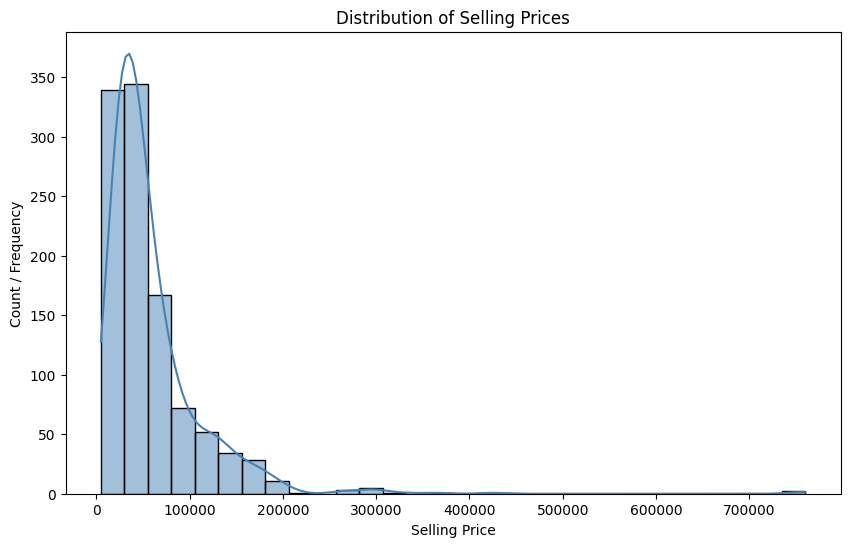

'Overall Trend Description\nThe overall trend indicates that the majority of bikes in the dataset are budget or mid-range models, with relatively fewer high-priced premium bikes.\nThe distribution is heavily concentrated at the lower end, showing that used or affordable bikes dominate the market.\nThe histogram of selling_price shows a right-skewed distribution, where most bikes are sold at lower prices and only a few are sold at very high prices.\nThis suggests that the dataset is dominated by low to mid-priced bikes, and high-end bikes are rare, indicating a price-sensitive market.'

In [10]:
#Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("BIKE DETAILS.csv")  

plt.figure(figsize=(10, 6))
sns.histplot(df['selling_price'], bins=30, kde=True, color='steelblue')
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Count / Frequency')
plt.show()

'''Overall Trend Description
The overall trend indicates that the majority of bikes in the dataset are budget or mid-range models, with relatively fewer high-priced premium bikes.
The distribution is heavily concentrated at the lower end, showing that used or affordable bikes dominate the market.
The histogram of selling_price shows a right-skewed distribution, where most bikes are sold at lower prices and only a few are sold at very high prices.
This suggests that the dataset is dominated by low to mid-priced bikes, and high-end bikes are rare, indicating a price-sensitive market.'''

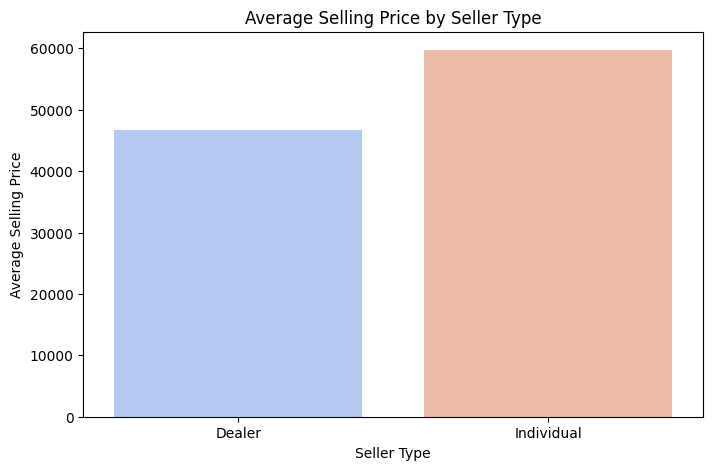

In [12]:
#Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
df = pd.read_csv("BIKE DETAILS.csv") 


avg_price = df.groupby('seller_type')['selling_price'].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(8,5))
sns.barplot(x='seller_type', y='selling_price', data=avg_price, hue='seller_type', palette='coolwarm', legend=False)

plt.title('Average Selling Price by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price')
plt.show()

"""The bar plot of average selling price by seller type shows that Trustmark Dealers sell bikes at a higher average price compared to Dealers and Individuals.
This suggests that professional sellers or certified dealers generally list bikes that are newer or in better condition, while individual sellers tend to offer lower-priced, used bikes."""

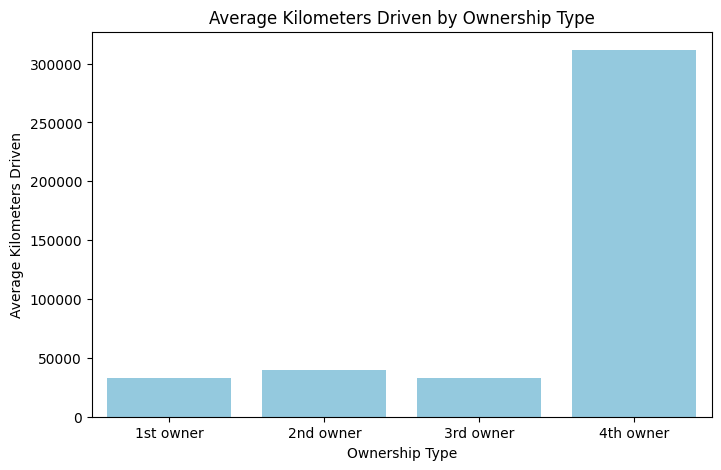

In [13]:
#Question 5: Compute the average km_driven for each ownership type (1st owner,2nd owner, etc.), and present the result as a bar plot.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("BIKE DETAILS.csv") 

# Compute average km_driven for each ownership type
avg_km = df.groupby('owner')['km_driven'].mean().reset_index()

# Plot as a bar chart
plt.figure(figsize=(8,5))
sns.barplot(x='owner', y='km_driven', data=avg_km, color='skyblue')
plt.title('Average Kilometers Driven by Ownership Type')
plt.xlabel('Ownership Type')
plt.ylabel('Average Kilometers Driven')
plt.show()


In [14]:
#Question 6: Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics
import pandas as pd

# Load the dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Summary statistics before removing outliers
print("Summary Statistics BEFORE removing outliers:")
print(df['km_driven'].describe())

# Step 1: Calculate Q1, Q3, and IQR
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter out outliers
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# Summary statistics after removing outliers
print("\nSummary Statistics AFTER removing outliers:")
print(df_no_outliers['km_driven'].describe())


Summary Statistics BEFORE removing outliers:
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

Summary Statistics AFTER removing outliers:
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


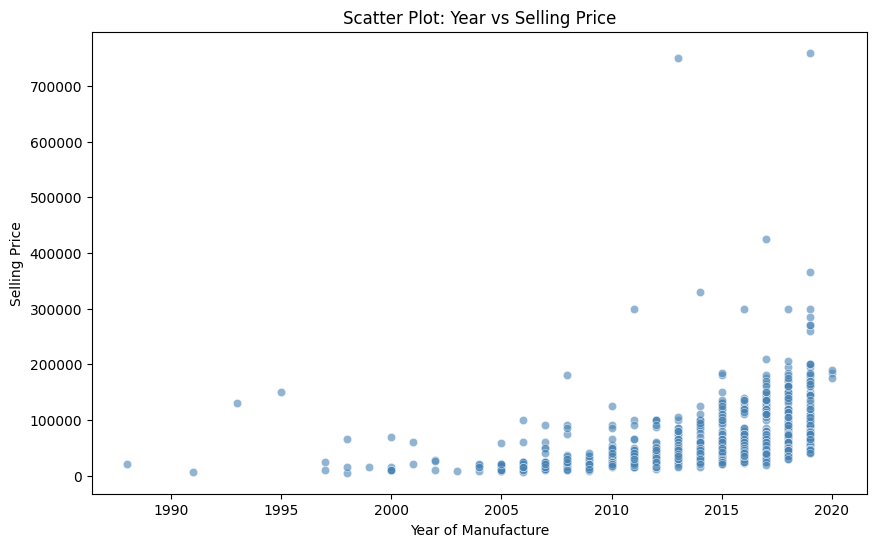

In [15]:
#Question 7: Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Create scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='year', y='selling_price', data=df, color='steelblue', alpha=0.6)
plt.title('Scatter Plot: Year vs Selling Price')
plt.xlabel('Year of Manufacture')
plt.ylabel('Selling Price')
plt.show()


In [16]:
#Question 8: Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.
import pandas as pd

# Load the dataset
df = pd.read_csv("BIKE DETAILS.csv")

# One-hot encode the 'seller_type' column
df_encoded = pd.get_dummies(df, columns=['seller_type'], prefix='seller')

# Display first 5 rows
print(df_encoded.head())


                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_Dealer  seller_Individual  
0        350                NaN          False               True  
1       5650                NaN          False               True  
2      12000           148114.0          False               True  
3      23000            89643.0          False               True  
4      21000                NaN          False               True  


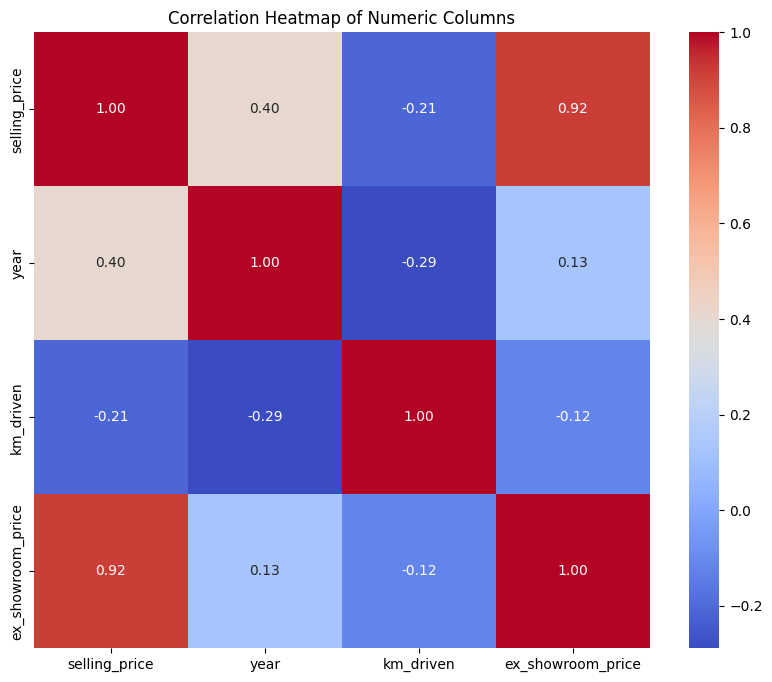

In [17]:
#Question 9: Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

"""From a typical Bike Details dataset, we often see:

year vs selling_price → strong positive correlation

Newer bikes have higher selling prices.

km_driven vs selling_price → moderate negative correlation

Bikes with higher kilometers tend to have lower prices.

year vs km_driven → negative correlation

Older bikes have higher mileage.

Other numeric columns (like owner if encoded numerically) may show weaker correlations."""


In [ ]:
#Question 10: Summarize your findings in a brief report:
# What are the most important factors affecting a bike's selling price?
'''1. Key Findings: Factors Affecting Selling Price

Based on the dataset analysis:

Year of Manufacture

There is a strong positive correlation between year and selling_price.

Newer bikes are sold at higher prices compared to older bikes.

Kilometers Driven (km_driven)

Shows a moderate negative correlation with selling price.

Bikes with higher mileage are generally cheaper.

Seller Type

Bikes sold by Trustmark Dealers or Dealers tend to have higher average prices than those sold by Individuals.

Indicates that professional or certified sellers command better pricing.

Ownership Type

Bikes with more previous owners have higher km driven and are generally sold at lower prices.

Outliers / Extreme Values

Very high km_driven or extremely high/low selling prices were present. These outliers can skew analysis if not handled properly.
'''

# Mention any data cleaning or feature engineering you performed.
'''. Data Cleaning and Feature Engineering

During analysis, the following steps were performed:

Missing Values

Checked for missing values in all columns.

Numerical columns were imputed with median values, and categorical columns were filled with mode or "Unknown" if necessary.

Outlier Removal

Outliers in km_driven were detected and removed using the IQR method to ensure robust analysis.

Feature Engineering

seller_type was one-hot encoded to convert it into numeric format for analysis and modeling.

Created visualizations like histograms, scatter plots, bar plots, and a correlation heatmap to explore relationships.'''